In [1]:
# import libraries
import pandas as pd
import numpy as np
import re
from scipy.sparse import csr_matrix
import random
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from collections import defaultdict
from sklearn.feature_selection import VarianceThreshold

In [2]:
# import data
image_data = pd.read_csv('test-data-images.txt', header=None)
image_data

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10735,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10736,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10737,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10738,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
# parse the data points from str to float
class RecordParser:
    def __init__(self):
        pass
    
    def parser(self, arr):
        # parse the data to float type
        data_float = []
        
        arr = arr.to_numpy()

        for row in arr:
            nums = re.findall(r'[0-9.]+', str(row))
            res = []
            for num in nums:
                num = float(num)
                res.append(num)
            data_float.append(res)
        
        return data_float

obj = RecordParser()
image_data_parsed = obj.parser(image_data)

In [4]:
# scaler = StandardScaler()
# image_data = scaler.fit_transform(image_data_parsed)
# image_data

In [5]:
image_data = csr_matrix(image_data_parsed)
image_data = TSNE(n_components=1, learning_rate='auto', init='random', 
                  perplexity=420, random_state=13).fit_transform(image_data)
image_data

array([[-18.656458 ],
       [ 10.476887 ],
       [ -3.9138577],
       ...,
       [ 15.791705 ],
       [ 25.114725 ],
       [-21.906385 ]], dtype=float32)

random_initial_centroids:  [[23.120267868041992], [13.745823860168457], [4.15481424331665], [-4.937835693359375], [17.91064453125], [-25.143749237060547], [14.157017707824707], [19.41477394104004], [1.5112552642822266], [12.372127532958984]]
Total Cluster SSEs:  24327.95874846896
average silhouette coefficient:  0.5868590221016096
4
7
10
2
7
2
2
8
10
6
9
2
1
3
6
3
5
7
9
2
2
6
7
4
9
10
3
2
1
2
2
1
8
4
5
9
6
4
3
9
9
2
1
4
4
10
5
6
4
1
5
2
2
10
7
3
3
9
10
8
10
2
2
6
5
3
4
4
3
10
1
2
2
2
2
8
4
4
9
2
5
5
3
5
1
3
6
4
4
6
10
10
5
1
5
2
4
10
4
3
5
9
1
7
2
9
10
5
10
7
4
9
3
2
5
2
8
9
4
6
6
4
6
8
10
3
2
2
10
8
9
6
1
1
6
4
8
4
9
3
4
4
5
8
9
7
3
2
9
3
6
7
9
7
2
6
9
10
6
5
1
4
7
1
3
1
4
8
6
6
5
4
9
2
1
5
4
5
8
1
10
1
1
9
1
3
6
6
2
4
9
9
9
7
9
4
7
3
1
6
1
8
10
1
7
4
10
5
1
7
2
10
5
8
5
8
6
4
8
8
6
6
2
2
7
5
8
6
6
8
2
1
3
8
2
4
9
6
6
7
2
2
3
9
2
4
10
4
4
6
9
8
5
2
9
7
9
6
8
6
9
4
4
4
4
5
6
2
9
4
4
2
9
4
4
9
10
10
9
8
6
5
9
1
7
2
1
2
5
5
5
3
6
3
9
4
3
7
1
8
5
7
1
9
6
6
3
6
3
9
6
2
2
7
4
10
4
10
5
7
1


6
1
7
6
7
5
10
9
4
7
10
2
8
1
5
10
10
6
2
7
3
4
10
1
5
5
9
9
5
7
6
1
4
2
1
1
9
8
9
6
5
6
10
7
9
3
3
6
8
5
2
1
7
2
10
6
7
9
8
3
10
2
7
2
9
2
7
6
3
2
3
2
8
9
6
3
3
5
7
9
7
9
1
7
3
8
1
3
10
1
4
3
2
3
6
9
6
2
8
4
9
8
2
4
8
5
3
9
8
1
6
2
3
6
8
1
9
9
9
7
5
2
6
8
6
8
2
8
7
5
7
6
10
6
6
8
1
8
1
1
1
9
10
2
9
7
5
8
1
9
2
8
6
3
9
4
4
9
3
6
10
4
5
7
4
8
8
2
2
5
1
6
1
3
2
4
5
7
8
1
2
10
7
10
2
8
6
1
4
6
4
9
7
10
1
9
3
8
4
8
2
6
5
6
9
6
8
6
3
2
9
5
3
6
3
9
7
9
4
10
4
8
5
2
5
1
8
3
4
8
8
5
4
6
1
3
8
6
10
9
4
8
2
1
6
5
2
4
2
8
3
2
3
9
9
4
9
5
9
9
3
10
3
2
3
6
5
1
6
5
2
7
6
7
1
2
7
4
5
3
5
7
2
3
9
7
4
8
5
2
9
3
1
9
5
1
3
8
4
4
6
8
8
7
10
2
1
10
1
10
4
4
3
9
10
8
5
9
3
10
4
7
5
2
4
3
5
6
2
10
4
7
5
2
10
7
6
5
3
2
8
9
3
1
3
7
8
3
2
5
5
5
10
1
4
9
2
8
9
10
2
7
9
6
6
3
8
1
8
4
8
9
8
9
4
2
5
9
4
7
4
4
7
3
10
3
8
6
10
5
5
8
1
3
1
10
2
3
2
7
2
5
5
10
3
8
1
10
6
9
2
1
4
3
3
10
4
2
5
8
8
10
5
1
6
10
6
7
5
8
2
4
5
3
5
3
1
2
4
3
5
5
2
6
9
3
7
4
10
7
4
2
7
4
8
1
10
9
10
7
1
3
2
7
5
1
4
3
7
8
2
2
3
5
2
4
1
9
1
10
4

5
7
5
6
10
9
5
4
8
3
8
7
7
6
5
1
9
10
9
7
3
10
3
2
9
8
3
4
4
7
3
6
1
6
5
9
5
5
3
2
8
9
2
5
5
8
2
5
7
2
3
1
8
1
9
3
5
8
7
6
8
2
5
3
8
8
3
7
3
7
8
5
3
4
7
7
9
4
9
4
5
1
1
2
6
4
5
6
8
5
6
3
8
6
2
2
6
9
8
2
2
5
2
9
6
10
1
5
5
7
6
8
2
2
6
4
3
2
8
3
7
3
1
9
8
9
10
4
9
3
4
8
5
7
5
6
9
4
8
4
9
9
5
1
5
1
6
6
5
2
2
4
4
8
6
6
3
4
4
3
2
1
2
5
6
4
7
4
2
1
2
5
9
5
8
4
7
7
2
7
1
3
8
6
7
9
10
8
4
3
3
9
5
2
5
6
8
9
5
6
9
2
7
5
3
7
1
8
3
1
10
8
2
5
4
8
5
5
10
6
8
8
9
5
9
3
6
5
4
4
8
5
6
9
6
7
5
4
2
6
8
3
10
7
1
6
5
5
6
7
10
10
4
6
5
8
1
9
7
5
7
4
5
3
6
8
2
2
9
8
7
9
10
9
7
9
3
1
10
4
1
1
10
6
2
6
6
8
3
3
6
3
4
5
6
5
3
1
9
6
8
1
9
5
7
1
9
5
2
5
10
4
6
3
8
1
7
4
2
7
10
2
7
4
7
3
4
1
5
8
2
10
1
3
6
7
9
7
3
3
3
2
8
10
6
3
5
8
10
8
3
4
3
4
9
4
1
3
6
7
8
9
1
3
2
5
1
8
5
2
1
5
3
5
2
10
7
1
10
4
7
2
9
8
3
6
6
5
9
6
9
2
4
9
2
10
4
7
10
5
8
1
10
8
4
5
1
6
2
9
5
6
10
9
10
7
4
8
2
1
6
6
6
10
3
7
5
2
5
8
4
9
6
2
1
5
7
9
10
6
3
4
2
2
3
4
7
4
4
2
1
6
5
1
10
2
5
1
5
3
1
9
6
4
4
7
2
2
2
10
9
3
5
4
7
2
2
1
5
6
7
10
4
7
5

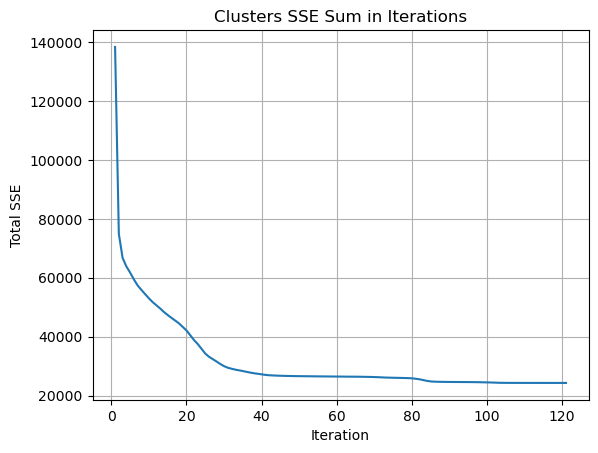

The cluster centroids stopped updating, stop condition met.


In [6]:
class KMeans:
    def __init__(self):
        pass
    
    # compute euclidean distance
    def computeEuclideanDistance(self, points, centroid):
        euclidean_distance = np.sqrt(sum([np.square(data_points - centroid_item) 
                                          for data_points, centroid_item in zip(points, centroid)]))
        
#         print("euclidean_distance: ", euclidean_distance)
        return euclidean_distance
    
    # for each cluster, compute datapoints to the cluster centroid distances and
    # store in cluster_distance_map
    def computeWithinClusterDistances(self, data, centroids):
        # to store cluter's all data point to centroid distances 
        cluster_distances_map = {}
                
        for centroid in centroids:
            cluster_distances_map[tuple(centroid)] = []
            
        for i, points in enumerate(data):
            distances = []
            for j, centroid in enumerate(centroids):
#                 print("data: ", points)
#                 print("centroid: ", centroid)
                euclidean_distance = self.computeEuclideanDistance(points, centroid)

                distances.append(euclidean_distance)
                
            # find out the index of the min distance in the arr, which 
            # determines the corresponding centroid 
            min_dist_index = distances.index(min(distances))
#             print("dist arr: ", distances)
#             print("min_dist_index: ", min_dist_index)
        
            # distances from the data points to each centroid are added to cluster distances map
            cluster_distances_map[tuple(centroids[min_dist_index])].append(distances[min_dist_index])
        
#         print("cluster_distances_map: ", cluster_distances_map)
        return cluster_distances_map
    
    # for each cluster, store the datapoints in that cluster to clusters map
    def collectClusterDataPoints(self, data, centroids):
        clusters = {}
        
        for centroid in centroids:
            clusters[tuple(centroid)] = []
            
        for i, points in enumerate(data):
#             print("data: ", points)
            distances = []
            for j, centroid in enumerate(centroids):
#                 print("centroid: ", centroid)
                euclidean_distance = self.computeEuclideanDistance(points, centroid)

                distances.append(euclidean_distance)
                
            # find out the index of the min distance in the arr, which 
            # determines the corresponding centroid 
            min_dist_index = distances.index(min(distances))
#             print("dist arr: ", distances)
#             print("min_dist_index: ", min_dist_index)

            clusters[tuple(centroids[min_dist_index])].append(data[i])
        
#         print("clusters: ", clusters)
        return clusters
        
    # for each cluster, compute individual datapoints SSE and store in
    # cluster_sse_map
    def computeClusterSSE(self, cluster_distances_map):
        cluster_sse_map = {}
        for k, v in cluster_distances_map.items():
            cluster_data_points = cluster_distances_map[k]
            sse_sum = np.sum(np.square(cluster_data_points))
            cluster_sse_map[k] = sse_sum
            
#         print("cluster_sse_map: ", cluster_sse_map)
        return cluster_sse_map
    
    # for each cluster, sum up the total of SSEs
    def computeTotalSSE(self, sse_map):
        total_sse = 0
        for k,v in sse_map.items():
            total_sse += sse_map[k]
            
#         print("total sse: ", total_sse)
        return total_sse
    
    # compute new centroids for each cluster by the mean of the data points, 
    # take in clusters map which has all data points for corresponding cluster
    def computeNewCentroids(self, clusters):
        new_centroids = []
        
        for k, v in clusters.items():
            # the data points in each cluster
            data_points = clusters[k]
#             print("data_points: ", data_points)

            # new centroid in each cluster is the mean of all points in the cluster
            new_centroid = (np.sum(data_points, axis=0) / len(data_points)).tolist()
            new_centroids.append(new_centroid)
    
#         print("new centroids: ", new_centroids)
        return new_centroids
    
    # compute new centroids for each cluster by k-means++
    def computeKMeansPlusPlusNewCentroids(self, cluster_distances_map, clusters):
        new_centroids = []
        for (centroid_key, data_points), (cluster_key, cluster_data) in zip(cluster_distances_map.items(), clusters.items()):
            data_points = cluster_distances_map[centroid_key]
            data_points_sum_square = np.square((np.sum(data_points)))
            
            probabilities = []
            for item in data_points:
                probability = np.square(item) / data_points_sum_square
                probabilities.append(probability)
            
            data_points_cluster = clusters[cluster_key]
            index = probabilities.index(max(probabilities))
            new_centroid = data_points_cluster[index]
            new_centroids.append(new_centroid)
#         print("newwwww: ", new_centroids)
        return new_centroids
            
    
    def generateClusterAssignmentRes(self, data, clusters):
        # collect the centroids cluster keys
        cluster_keys = list(clusters.keys())
        
        for row in data:
            for k, v in clusters.items():
                # if the row is a value in a cluster
                if row in clusters[k]:
                    # print out the index of the centroid in cluster keys + 1, because
                    # the cluster number starts from one
                    print(cluster_keys.index(k) + 1)
    
    # validate cluster accuracy by computing silhouette coefficient for individual point
    def computeSilhouetteCoefficient(self, clusters):
        # calculate cohesion
        # a = average distance of i to the points in its cluster
        # avg within cluster distances map with the key of
        # each centroid data point and the avg distances of
        # a data point to other data points as values in the cluster.
        avg_within_cluster_distances = defaultdict(list)
        for k, v in clusters.items():
            within_cluster_point_distances = []
            data_points = clusters[k]
            for item in data_points:
                for data_point in data_points:
                    if data_point != item: 
                        # dist from a data point in a cluster to each/another other
                        # data points in the cluster is computed through euclidean distance
                        # the result is appended to within cluster point distances array,
                        # once all distances to other data points are computed, avg distance
                        # is computed based on the sum of the within cluster point distances array
                        # divided by the total length of the array because that means how many
                        # data points we compared.
                        dist = self.computeEuclideanDistance(item, data_point)
                        within_cluster_point_distances.append(dist)
                        
                avg_distance = np.sum(within_cluster_point_distances) / len(within_cluster_point_distances)
                # avg distance from a datapoint to other data points in the cluster
                # is then added to the map of avg within cluster distances, with the 
                # associated centroid data point as key. so that we know the avg distance
                # of this data point belongs to what cluster.  The length of the values
                # in this map is the same amount of the data points in the cluster. 
                # each avg distance can be traced to corresponding data point in the cluster.
                avg_within_cluster_distances[k].append(avg_distance)
                
                # avg_within_cluster_distances is a collection of a in each cluster. 
                # to compute individual point's silhouette coefficient, we will 
                # match the individual a to b in the map below for separation. 
                # and compute the formula. i's position should be the same
                # in these 2 dictionary, because we are computing points sequentially
                # from the same clusters map.
                
        # calculate separation
        # b = min (average distances of i to points in another cluster k,
        # for all k not containing i)
        avg_other_cluster_distances = defaultdict(list)
        
        # collection of the data points from all clusters
        data_points_all_clusters = []
        for k, v in clusters.items():
            data_points = clusters[k]
            data_points_all_clusters.append(data_points)
#         print(data_points_all_clusters)
        
        # to prevent duplicate key issue, every cluster item
        # is mapped to unique index in incrementing order,
        # so that in map we are not going to see a key asscoiated
        # with more values we expected
        data_point_index_map = {}
        index_count = 0
        for data in data_points_all_clusters:
            for item in data:
                data_point_index_map[tuple(item)] = index_count
                index_count += 1
#         print("ah: ", data_point_index_map)
        
        # for cluster data points
        avg_distances_map = defaultdict(list)
        dists_to_other_data_points = []
        distances_map = defaultdict(list)
        for i, cluster_data_point_i in enumerate(data_points_all_clusters):
            # now calculate each data point in a cluster's distance to 
            # all other data points in another cluster
            for j, cluster_data_point_j in enumerate(data_points_all_clusters):
                if i != j:
#                     print(i, j)
                    # now we have access to each data point in a cluster against each
                    # data point in another cluster, we calculate the euclidean distance
                    # from the data point to each data point in another cluster and get
                    # the avg, which represents the avg separation for this specific
                    # data point to all data points in another cluster
                    for cluster_data_point in cluster_data_point_i:
                        for item in cluster_data_point_j:

                            dist = self.computeEuclideanDistance(cluster_data_point, item)
                            # append to a distance map with associated index number of 
                            # the key (the associated key that is being
                            # computed against other data points), so it is easier to gather
                            # the avg separation for each data point without duplicate
                            # keys generates incorrect key distance mapping
                            index_to_map = data_point_index_map[tuple(cluster_data_point)]
                            distances_map[index_to_map].append(dist)
                        
                        # this step is (avg dist(c1, c2), avg dist(c1, c3)) in separation
                        dists = distances_map[index_to_map]
                        avg_dist = np.sum(dists) / len(dists)
                        avg_distances_map[index_to_map].append(avg_dist)
                        distances_map[index_to_map] = []
        
#         print("clusters: ", clusters)
#         print("avg_distances_map: ", avg_distances_map)
    
        # now we need to find the min of the avg distances for each
        # data point to other cluster data points. 
        min_avg_distances = defaultdict(list)
        for k, v in avg_distances_map.items():
            vals = avg_distances_map[k]
#             print(vals)
            min_avg_distances[k].append(min(vals))
#         print("min_avg_distances: ", min_avg_distances)
        
        # now we append the min separation for each data point
        # to the corresponding index in the corresponding centroid
        separations_in_clusters = defaultdict(list)
        for k, v in clusters.items():
            vals = clusters[k]
            for item in vals:
                min_dist_item = min_avg_distances[data_point_index_map[tuple(item)]]
#                 print(min_dist_item)
                separations_in_clusters[k].append(min_dist_item)
#         print(separations_in_clusters)

        # calculate silhouette coefficient for each data point
        silhouette_coefficient_data_points = []
        points_cohesion = np.concatenate([avg_within_cluster_distances[k] for k, 
                                          v in avg_within_cluster_distances.items()]).tolist()
        points_separation = np.concatenate([separations_in_clusters[k] for k, 
                                            v in separations_in_clusters.items()]).tolist()
        
#         print(points_cohesion)
#         print(points_separation)
        
        for i, a in enumerate(points_cohesion):
            b = points_separation[i][0]
            sc = (b - a) / max(a, b)
            silhouette_coefficient_data_points.append(sc)
#         print(silhouette_coefficient_data_points)
        
        # now we have the sc for all data points, we can compute avg_silhouette coefficient
        avg_silhouette_coefficient = np.sum(silhouette_coefficient_data_points) / len(silhouette_coefficient_data_points)
        print("average silhouette coefficient: ", avg_silhouette_coefficient)
            
                
    def runKMeans(self, data, centroids):
        total_sse_history = []
        # keep executing the methods until stop condition is met
        while True:
            cluster_distances_map = self.computeWithinClusterDistances(data, centroids)
            clusters = self.collectClusterDataPoints(data, centroids)
            cluster_sse = self.computeClusterSSE(cluster_distances_map)
            total_sse = self.computeTotalSSE(cluster_sse)
            total_sse_history.append(total_sse)
            new_centroids = self.computeNewCentroids(clusters)
#             new_centroids = self.computeKMeansPlusPlusNewCentroids(cluster_distances_map, clusters)
            # stop if new_centroids is the same as prev centroids, centroids stop updating
            if new_centroids == centroids:
                print("Total Cluster SSEs: ", total_sse)
                self.computeSilhouetteCoefficient(clusters)
                self.generateClusterAssignmentRes(data, clusters)
                # plot the SSE history to observe the SSE change because
                # the goal is to minimize SSE
                plt.plot(range(1, len(total_sse_history) + 1), total_sse_history)
                plt.title('Clusters SSE Sum in Iterations')
                plt.xlabel('Iteration')
                plt.ylabel('Total SSE')
                plt.grid(True)
                plt.show()
                print("The cluster centroids stopped updating, stop condition met.")
                break
            
            centroids = new_centroids
    
    # plot number of clusters k and final total SSE for each k,
    # will be called for the best performing experiments
    def runKMeansKClusters(self, data):
        cluster_final_total_sse = []
        
        for k in range(2, 21, 2):
            random_initial_centroids = random.sample(data, k)
            
            centroids = random_initial_centroids
            total_sse_history = []
        
            while True:
                cluster_distances_map = self.computeWithinClusterDistances(data, centroids)
                clusters = self.collectClusterDataPoints(data, centroids)
                cluster_sse = self.computeClusterSSE(cluster_distances_map)
                
                # total_sse history
                total_sse = self.computeTotalSSE(cluster_sse)
                total_sse_history.append(total_sse)
                
                new_centroids = self.computeNewCentroids(clusters)
    #             new_centroids = self.computeKMeansPlusPlusNewCentroids(cluster_distances_map, clusters)
                # stop if new_centroids is the same as prev centroids, centroids stop updating
                if new_centroids == centroids:
                    # the last sse in the sse history is the final sse
                    cluster_final_total_sse.append(total_sse_history[-1])
                    print("Total Cluster SSEs for {} clusters: {}".format(k, total_sse))
                    break
                
                centroids = new_centroids
            
        # plot the SSE history to observe the SSE change because
        # the goal is to minimize SSE
        plt.plot(range(1, len(cluster_final_total_sse) + 1), cluster_final_total_sse)
        plt.title('Total SSEs in Number of Clusters K')
        plt.xlabel('Number of Clusters K')
        plt.ylabel('Total SSE')
        plt.grid(True)
        plt.show()
            
np.random.seed(88)

# toy_data = [[1, 2, 3, 4], [5, 6, 7, 8], [-1, -2, -3, -4], [9, 10, 11, 12], [-3, -4, -5, -6], [0, 1, 2, 3]]
# random_initial_centroids = [[5, 6, 7, 8], [-1, -2, -3, -4], [0, 1, 2, 3]]

random_initial_centroids = random.sample(image_data.tolist(), k=10)
print("random_initial_centroids: ", random_initial_centroids)

obj = KMeans()
obj.runKMeans(image_data.tolist(), random_initial_centroids)

In [ ]:
# generates "plot of total cluster SSEs vs. value of cluster K increasing from 2 to 20 in steps of 2 (x-axis)"
obj.runKMeansKClusters(image_data.tolist())

Total Cluster SSEs for 2 clusters: 675729.2189002848
Total Cluster SSEs for 4 clusters: 160797.6700130779
Total Cluster SSEs for 6 clusters: 74606.2387606817
Total Cluster SSEs for 8 clusters: 39098.789561201935
Total Cluster SSEs for 10 clusters: 27468.162693056784
Total Cluster SSEs for 12 clusters: 18650.549413290853
Total Cluster SSEs for 14 clusters: 12812.040882740264
Total Cluster SSEs for 16 clusters: 12608.233487098965
Total Cluster SSEs for 18 clusters: 7745.105393077318
